In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
# original_df = pd.read_csv('../data/preprocessed_data.csv')
# df = pd.read_csv('../data/cleaned_data.csv')
# df = pd.read_csv('../data/pca_standard_encode_data.csv')
# df = pd.read_csv('../data/pca_one_hot_encode_data_without_location_and_color.csv')

df_cleaned = df = pd.read_csv('../data/cleaned_data.csv')
df = pd.read_csv('../data/pca_one_hot_encode_data.csv')

In [11]:
print(df_cleaned.shape)
print(df.shape)

(3900, 103)
(3900, 75)


In [3]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def hopkins_statistic(X, sample_size=0.05):
    """
    Compute the Hopkins statistic for the dataset X
    :param X: Array-like, shape (n_samples, n_features)
              The data to compute the Hopkins statistic for.
    :param sample_size: Float, optional, default: 0.05
                        The proportion of the dataset to use for the test.
    :return: Float, the Hopkins statistic
    """
    if isinstance(sample_size, float):
        n_samples = int(sample_size * X.shape[0])
    else:
        n_samples = sample_size

    # Randomly sample n_samples points from X
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.choice(X.shape[0], n_samples, replace=False)
    random_points = X[random_indices]

    # Generate n_samples random points in the same space as X
    min_vals, max_vals = np.min(X, axis=0), np.max(X, axis=0)
    synthetic_points = np.random.uniform(low=min_vals, high=max_vals, size=(n_samples, X.shape[1]))

    # Calculate distances to the nearest neighbor in the original data
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    w_distances, _ = nbrs.kneighbors(random_points)
    u_distances, _ = nbrs.kneighbors(synthetic_points)

    # Calculate the Hopkins statistic
    H = np.sum(w_distances) / (np.sum(w_distances) + np.sum(u_distances))
    return H

In [4]:
# Calculate Hopkins statistic
X = df.values

hopkins_stat = hopkins_statistic(X, sample_size=0.05)
print(f'Hopkins Statistic: {hopkins_stat}')

Hopkins Statistic: 7.506843764735e-09


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.21151061332347526


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.12321075203950958


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.08374531234429201


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.07365157397569341


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.06997077454737284


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.06374281799834526


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.05977609540810406


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.056555560576858024


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is : 0.05263364387628198


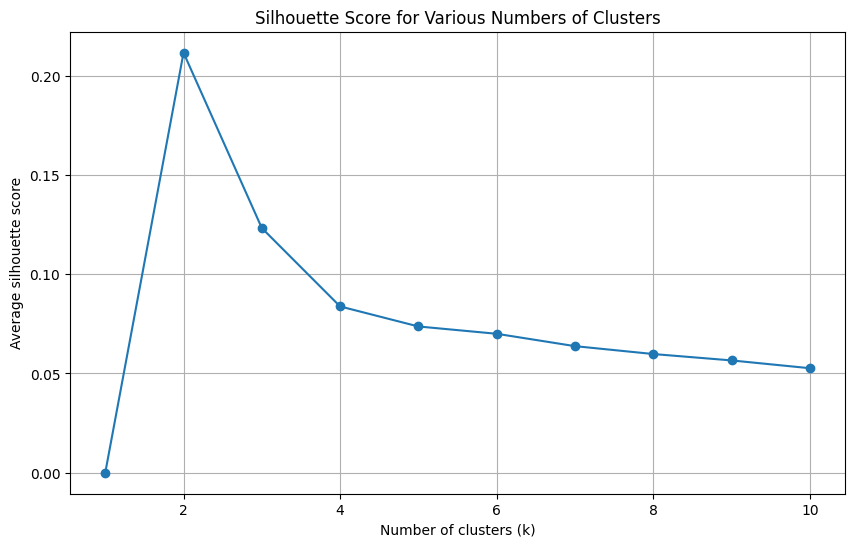

In [5]:
# Convert to numpy array
X = df.values

# Range of number of clusters to try
range_n_clusters = range(1, 11)  # from 1 to 10 clusters

# List to hold silhouette scores
silhouette_avg_list = []

# Calculate silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    if n_clusters == 1:
        silhouette_avg_list.append(0)
        continue
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_list, marker='o')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.21151061332347526


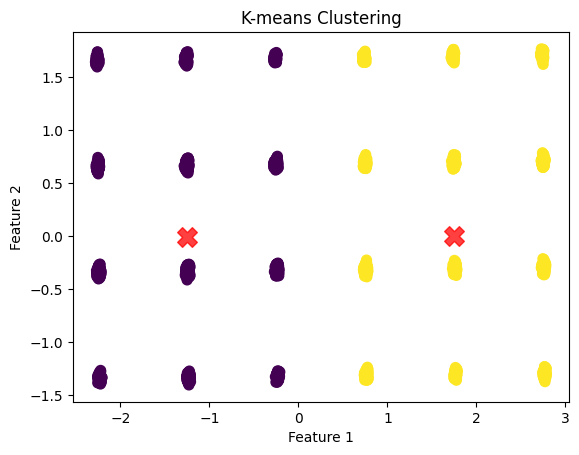

In [6]:
# KMeans clustering

# Convert the dataframe into a numpy array
X = df.values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, y_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [13]:
# add the cluster labels to the original dataframe
df_cleaned['cluster'] = y_pred

In [15]:
df_cleaned.to_csv('../data/cleaned_data_cluster.csv', index=False)